## DSC530 Week 7 Exercises for Chap 7 & 8
### Figueroa, Holly

  


### Exercise 7-1
  
Using data from the NSFG, make a scatter plot of birth weight versus mother's age. Plot percentiles of birth weight versus mothers age. Compute Pearson's and Spearman's correlations. How would you characterize the relationship between these variables?


In [1]:
from __future__ import print_function

import sys
import numpy as np
import math
import random

import first
import thinkplot
import thinkstats2
import nsfg
import pandas as pd

from estimation import RMSE, MeanError
from scipy import stats

In [2]:
# Get data from nsfg for mothers who had babies
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome ==1]

In [3]:
# Prep Data, removing missing values
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [4]:
# Create sample to clarify plot outcome
sample = thinkstats2.SampleRows(live, 1000, replace = False)

**Scatter Plot**

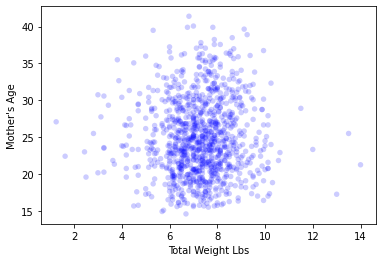

<Figure size 576x432 with 0 Axes>

In [5]:
# Plot total birth weight with mother's age
thinkplot.Scatter(sample.totalwgt_lb, sample.agepreg)
thinkplot.Show(xlabel = 'Total Weight Lbs', ylabel = "Mother's Age")

**Plot percentiles of birth weight versus mothers age**

In [6]:
# Create bins for pregnancy ages, define indices to be paired with weight percentages
bins = np.arange(10, 50, 3)
indices = np.digitize(live.agepreg, bins)
groups = live.groupby(indices)

In [7]:
# Find the mean age and CDF of baby weights
ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

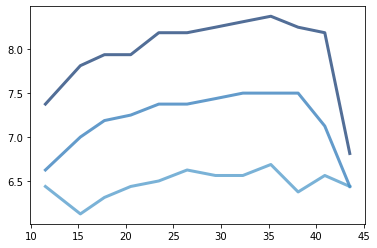

In [8]:
for percent in[75,50,25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label = label)

**Calculate Pearson's and Spearman's Correlation**

In [9]:
ages = live.agepreg
weights = live.totalwgt_lb

print('thinkstats2 Corr', thinkstats2.Corr(ages, weights))
print('thinkstats2 SpearmanCorr', 
          thinkstats2.SpearmanCorr(ages, weights))

thinkstats2 Corr 0.0688339703541091
thinkstats2 SpearmanCorr 0.09461004109658226


**Conclusion** The scatter plot, being spread as it is, suggests these variables are not likely correlated. The percentiles plot suggests that these variables are not linear in relation. It is interesting to note that baby weights appear lower on average at ages 10-15, and again weight appears to drop dramticaly when mothers are aged between 40 and 45 yrs. The percentiles plot shows some linear quality where weight appears to rise with mother's age between approx ages 15-25. Finally, Both results for Pearson and Spearman's correlations are very low, under 1 percent. This supports, again, the lack of a linear relationship leaving to conclude if any relationship does exist, it is not non-linear.

### Chapter 8 Exercise 8.1
  
Run similar experiments (using sample mean and median) to see if these are biased estimates

In [10]:
# Add functions from book to use here. 

# Mean Estimates
def Estimate1(n=7, m=100000):
    
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))

# Variance Estimates
def Estimate2(n=7, m=100000):
   
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

In [11]:
# Run Estimates for mean and variance
Estimate1(30, m = 2000)

Estimate2(30, m = 2000)

Experiment 1
mean error xbar 0.005436446781830597
mean error median 0.004570237083367493
Experiment 2
RMSE biased 0.254517019314664
RMSE unbiased 0.2621103463306372


**Conclusion** My experimental first estimates based on mean vs median was counter to the book as the estimate based on median appears lower. For variance estimates, S2 n-1 (biased)offered a lower RMSE result. 

### Exercise 8.2

In [12]:
#